# Carv Airdrop Analysis

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Load the datasets
carv_node_sale = pd.read_csv('carv_node_sale.csv', delimiter=';')
avgprice = pd.read_csv('avgprice.csv', delimiter=';')

# Display the first 5 rows of both datasets
print("Carv Node Sale Dataset:")
print(carv_node_sale.head())
print("\nAvgprice Dataset:")
print(avgprice.head())

Carv Node Sale Dataset:
   tier   PRICE  NOSOLD  TOTALSOLD
0   T10  0.4217     2.0     0.8434
1  PT02  0.1580  1900.0   300.2000
2  PT03  0.1817  2613.0   474.7821
3  PT05  0.2340  3500.0   819.0000
4  PT04  0.2071  2625.0   543.6375

Avgprice Dataset:
                                        BUYER  nodes  TOTALPAID  AVGPRICE
0  0xc402ae3f61d6eb98b85ee7c11ed5f6a13e314af0      1     0.2633  0.263300
1  0x6a8b14912fe74baedd196e1904d0d2a9b29f966f     33    12.8784  0.390255
2  0x16edbf03fa522d5cce0064e76405237f3234b53a     21     5.6409  0.268614
3  0x0a9be70a67e8b7e20b1a67881b963fabf4babeb2      1     0.4217  0.421700
4  0x7e0867be60257243586431cde9d8623eff1aacd9      1     0.4217  0.421700


## Calculating Token Retention Rate
The token retention rate represents the percentage of airdropped tokens that were sold. To calculate this, we sum the total airdropped tokens and the sold tokens, then compute the retention rate as the ratio between sold and airdropped tokens.

In [71]:
# 1. Calculating Token Retention Rate
# Total amount of airdropped tokens
total_airdrop_tokens = carv_node_sale['TOTALSOLD'].sum()

# Total amount of sold tokens (nodes purchased)
total_tokens_sold = avgprice['nodes'].sum()

# Calculating token retention rate
retention_rate = (total_tokens_sold / total_airdrop_tokens) * 100
print(f"\nToken Retention Rate: {retention_rate:.2f}%")


Token Retention Rate: 1.23%


***Report:***
The token retention rate is calculated by comparing the total number of tokens sold with the total number of tokens airdropped. This rate helps to understand how much of the airdropped supply has been utilized or traded. A higher retention rate indicates better engagement from the users with the airdropped tokens.

## User Segmentation Based on Token Purchases
In this step, we segment users based on the number of tokens they claimed. This segmentation helps to categorize users who claimed a small number of tokens versus those who claimed a larger amount.

In [75]:
# Segmentation based on token purchases
avgprice['segment_by_tokens'] = pd.cut(avgprice['nodes'], bins=[0, 5, 10, 20, 50, 100, float('inf')],
                                       labels=['0-5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Display the segmented users
print("\nSegmented Users Based on Token Purchases:")
print(avgprice[['BUYER', 'segment_by_tokens']].head())


Segmented Users Based on Token Purchases:
                                        BUYER segment_by_tokens
0  0xc402ae3f61d6eb98b85ee7c11ed5f6a13e314af0               0-5
1  0x6a8b14912fe74baedd196e1904d0d2a9b29f966f             21-50
2  0x16edbf03fa522d5cce0064e76405237f3234b53a             21-50
3  0x0a9be70a67e8b7e20b1a67881b963fabf4babeb2               0-5
4  0x7e0867be60257243586431cde9d8623eff1aacd9               0-5


***Report:***
We segment users into different categories based on the number of tokens they purchased. The segmentation bins are: 0-5 tokens, 6-10 tokens, 11-20 tokens, 21-50 tokens, 51-100 tokens, and over 100 tokens. This allows us to analyze how different user segments engaged with the airdrop in terms of the number of tokens they claimed.

## User Segmentation Based on Payment Amount
This step segments users based on the amount they paid for the tokens. This segmentation shows us how much each user has invested and provides insights into high-spending users.

In [79]:
# Segmentation based on the payment amount
avgprice['segment_by_spending'] = pd.cut(avgprice['TOTALPAID'], bins=[0, 5, 10, 20, 50, 100, float('inf')],
                                         labels=['0-5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Display the segmented users
print("\nSegmented Users Based on Payment Amount:")
print(avgprice[['BUYER', 'segment_by_spending']].head())


Segmented Users Based on Payment Amount:
                                        BUYER segment_by_spending
0  0xc402ae3f61d6eb98b85ee7c11ed5f6a13e314af0                 0-5
1  0x6a8b14912fe74baedd196e1904d0d2a9b29f966f               11-20
2  0x16edbf03fa522d5cce0064e76405237f3234b53a                6-10
3  0x0a9be70a67e8b7e20b1a67881b963fabf4babeb2                 0-5
4  0x7e0867be60257243586431cde9d8623eff1aacd9                 0-5


***Report:***
Users are segmented based on the amount they spent on the airdrop. Segments include: 0-5, 6-10, 11-20, 21-50, 51-100, and 100+ units of currency. This segmentation allows us to identify the high-value users who have contributed more financially to the airdrop.

## Analyzing Token Retention Across Payment Segments
We now analyze how the retention rate varies across different payment segments. Visualizing this helps to understand if higher spenders are more likely to retain their tokens.

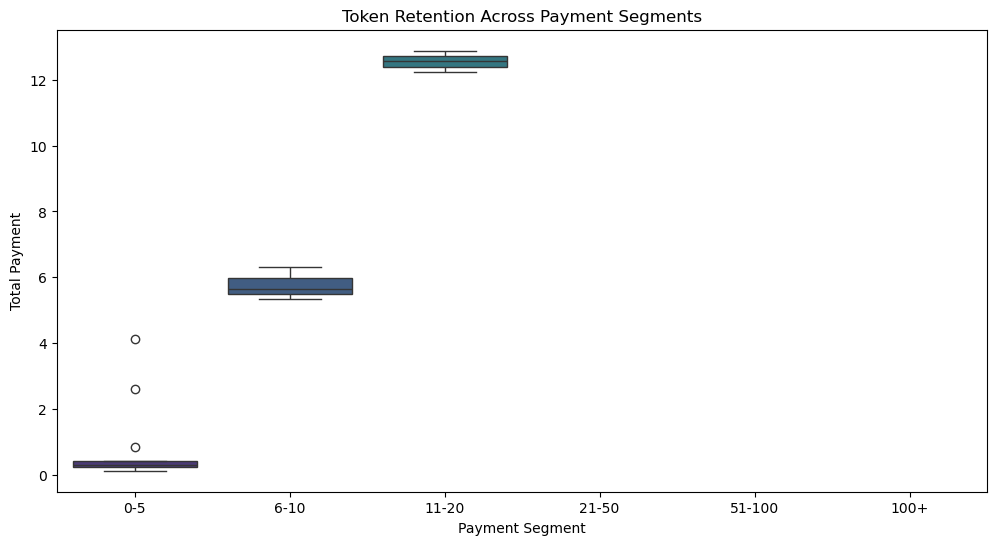

In [83]:
# Visualizing the retention rate across payment segments
plt.figure(figsize=(12, 6))
sns.boxplot(data=avgprice, x='segment_by_spending', y='TOTALPAID', palette='viridis')
plt.title("Token Retention Across Payment Segments")
plt.xlabel('Payment Segment')
plt.ylabel('Total Payment')
plt.show()

***Report:***
This visualization shows the relationship between the total payment amount and token retention. By visualizing the distribution of token retention across payment segments, we can assess if higher spenders are more likely to retain their tokens, which can inform future airdrop strategies.

## Recommendations for Improving Airdrop Performance
Based on the analysis, we propose strategies for improving the effectiveness of future airdrops. These strategies focus on targeting high-value users and ensuring more effective engagement.

In [87]:
# Recommendations for improving airdrop performance
print("\nRecommendations:")
print("1. Segment users more precisely to tailor airdrop strategies for each group.")
print("2. Provide additional tokens or incentives for high-spending users to encourage further engagement.")
print("3. Include staked tokens and tokens added to liquidity pools in the airdrop calculation to better assess token usage.")
print("4. Adjust airdrop rates to incentivize users who stake their tokens or add them to liquidity pools.")


Recommendations:
1. Segment users more precisely to tailor airdrop strategies for each group.
2. Provide additional tokens or incentives for high-spending users to encourage further engagement.
3. Include staked tokens and tokens added to liquidity pools in the airdrop calculation to better assess token usage.
4. Adjust airdrop rates to incentivize users who stake their tokens or add them to liquidity pools.


***Report:***
Several recommendations were made to improve the airdrop performance:

- ***Precise User Segmentation:*** Segmenting users more specifically will allow for more targeted airdrop strategies.
- ***Incentivizing High Spenders:*** Offering extra rewards or tokens to high-spending users could encourage more engagement.
- ***Incorporating Staked Tokens:*** Considering staked tokens and those in liquidity pools would provide a more accurate reflection of token usage.
- ***Adjusting Airdrop Rates:*** Adjusting the airdrop distribution rates to reward token stakers and liquidity providers could improve the retention rate.

## Conclusion
In this analysis, we calculated the token retention rate for Carv’s airdrop and segmented the users based on various characteristics such as the number of tokens claimed and the payment amounts. We also provided several recommendations for improving future airdrop campaigns. These insights can help the Carv team to optimize their airdrop strategy and achieve better user engagement in future distributions.